In [13]:
import numpy as np
import pandas as pd
import random as rd

%run KMeans.ipynb
%run EM-GMM.ipynb

In [26]:
mean1 = [-1, -1]  
cov1 = [[2, .5], [.5, 1]]  
    
mean2 = [1, -1]  
cov2 = [[1, -.5], [-.5, 2]] 

mean3 = [0, 1]  
cov3 = [[1, 0], [0, 2]] 

y_true = np.array(['a'] * 100 + ['b'] * 100 + ['c'] * 100)
# centroid_label
true_centres = [[-1,-1], [1,-1], [0,1]]
true_labels = ['a', 'b', 'c']

accuracy_KMeans = []
objective_KMeans = []
accuracy_EM = []
objective_EM = []

sigma_val = [.5, 1, 2, 4, 8]
for sigma in sigma_val:
    print("Sigma = ", sigma)
    # generate data
    new_cov1 = [[sigma * val for val in row] for row in cov1]
    X1 = np.random.multivariate_normal(mean1,new_cov1,100)

    new_cov2 = [[sigma * val for val in row] for row in cov2]
    X2 = np.random.multivariate_normal(mean2,new_cov2,100)

    new_cov3 = [[sigma * val for val in row] for row in cov3]
    X3 = np.random.multivariate_normal(mean3,new_cov3,100)

    X = np.concatenate((X1,X2,X3))
    
    ########### KMeans
    k = KMeans(K=3, max_iters=150)
    centroids, y_pred = k.predict(X)
    print("  Kmeans centroids:\n", centroids)

    centroid_label = [[] for _ in range(3)]
    i=0
    for centr in centroids:
        dist = [L2_dist(centr, true) for true in true_centres]
        centroid_label[i] = true_labels[np.argmin(dist)]
        i += 1
#     centroid_label
    
    # accuracy
    y_pred_int = np.array(y_pred.astype(int))
    y_pred_label =[centroid_label[i] for i in y_pred_int]
    acc = np.sum(y_pred_label==y_true)/300
    print("  KMeans accuracy:", np.round(acc,3),"\n")
    accuracy_KMeans = np.append(accuracy_KMeans, acc)
    
    # objective
    assign_centroid = np.array([centroids[i] for i in y_pred_int])
    obj = np.square([L2_dist(X, assign_centroid)])
    print("  KMeans objective:", np.round(obj,3),"\n")
    objective_KMeans = np.append(objective_KMeans, obj)
    
    ########## EM
    EM = EM_GMM(K=3, dim=2)
    centroids_EM, y_pred_EM = EM.predict(X)
    print("  EM-GMM centroids:\n", centroids_EM)
    
    # centroid_label
    centroid_label = [[] for _ in range(3)]
    i=0
    for centr in centroids_EM:
        dist = [L2_dist(centr, true) for true in true_centres]
        centroid_label[i] = true_labels[np.argmin(dist)]
        i += 1
#     `centroid_label

    # accuracy
    y_pred_int = np.array(y_pred_EM.astype(int))
    y_pred_label_EM =[centroid_label[i] for i in y_pred_int]
    acc = np.sum(y_pred_label_EM == y_true)/300
    print("  accuracy_EM:", np.round(acc,3),"\n")
    accuracy_EM = np.append(accuracy_EM, acc)

    # objective
    assign_centroid = np.array([centroids_EM[i] for i in y_pred_int])
    obj = np.square([L2_dist(X, assign_centroid)])
    print("  objective_EM:", np.round(obj,3),"\n")
    objective_EM = np.append(objective_EM, obj)

Sigma =  0.5
  Kmeans centroids:
 [[ 0.90203368 -1.32878595]
 [-1.30696691 -1.05795511]
 [ 0.02349812  0.96495509]]
  KMeans accuracy: 0.777 

  KMeans objective: [305.397] 

  EM-GMM centroids:
 [[ 0.84933152 -1.41379359]
 [-0.88886701 -0.93297719]
 [ 0.08717386  0.8392392 ]]
  accuracy_EM: 0.777 

  objective_EM: [317.481] 

Sigma =  1
  Kmeans centroids:
 [[-1.35190479 -1.02749399]
 [ 1.24616985 -1.38261783]
 [ 0.15008265  1.55521922]]
  KMeans accuracy: 0.697 

  KMeans objective: [541.499] 

  EM-GMM centroids:
 [[-0.19572019  1.22128834]
 [ 0.92977834 -0.7122871 ]
 [-0.95963111 -1.07480733]]
  accuracy_EM: 0.707 

  objective_EM: [623.253] 

Sigma =  2
  Kmeans centroids:
 [[ 0.53563495  1.49257533]
 [-1.43157364 -1.09737517]
 [ 1.4754374  -2.25301292]]
  KMeans accuracy: 0.583 

  KMeans objective: [817.565] 

  EM-GMM centroids:
 [[-1.13037609 -0.85402147]
 [ 2.35694346  1.14733127]
 [ 0.68343652 -0.35451105]]
  accuracy_EM: 0.51 

  objective_EM: [1324.724] 

Sigma =  4
  Kmea

In [24]:
accuracy_KMeans = []

accuracy_KMeans = np.append(accuracy_KMeans, 1)

In [27]:
accuracy_KMeans

array([0.77666667, 0.69666667, 0.58333333, 0.57666667, 0.47      ])

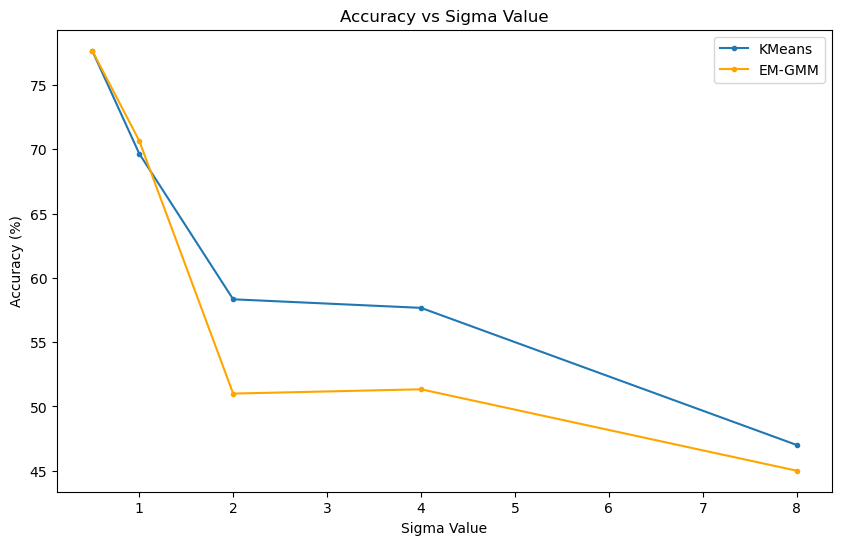

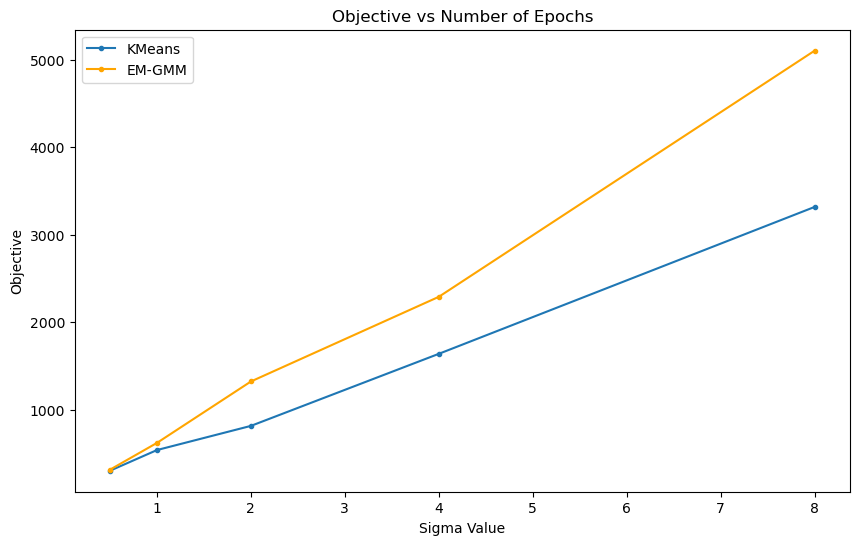

In [28]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.plot(sigma_val, 100*accuracy_KMeans, linestyle='-',marker = 'o',markersize = 3,
         label='KMeans')
plt.plot(sigma_val, 100*accuracy_EM, linestyle='-',marker = 'o',markersize = 3, color = 'orange',
         label='EM-GMM')
plt.legend(loc='best')
plt.title('Accuracy vs Sigma Value')
plt.xlabel('Sigma Value')
plt.ylabel('Accuracy (%)')
plt.show()


# objective plot
plt.figure(figsize=(10, 6))
plt.plot(sigma_val, objective_KMeans, linestyle='-',marker = 'o',markersize = 3,
         label='KMeans')
plt.plot(sigma_val, objective_EM, linestyle='-',marker = 'o',markersize = 3, color = 'orange',
         label='EM-GMM')
plt.legend(loc='best')
plt.title('Objective vs Number of Epochs')
plt.xlabel('Sigma Value')
plt.ylabel('Objective')
plt.show()
